## **Завдання 1**

Згенерувати N тривимiрних незалежних випадкових векторiв, в яких координати незалежнi, першi двi координати мають показниковий розподiл з параметром 1, третя координата має стандартний нормальний розподiл.

In [15]:
import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [16]:
def generate_random_vectors(num_vectors):
    # Перші дві координати: показниковий розподіл з параметром 1 (scale = 1)
    # Третя координата: стандартний нормальний розподіл (mean = 0, std = 1)
    
    # Генеруємо перші дві координати з експоненційного розподілу
    exponential_coords = np.random.exponential(scale=1.0, size=(num_vectors, 2))
    
    # Генеруємо третю координату зі стандартного нормального розподілу
    normal_coord = np.random.normal(loc=0.0, scale=1.0, size=(num_vectors, 1))
    
    # Об'єднуємо три координати у 3D вектори
    vectors = np.hstack([exponential_coords, normal_coord])
    
    return vectors

**Пояснення роботи алгоритму**:
1. np.random.exponential(scale=1.0, size=(N, 2)) повертає масив розміром N×2, кожен елемент якого – випадкова величина з експоненційного розподілу з параметром 1. Експоненційний розподіл з параметром λ=1 має щільність ймовірності f(x)=exp(-x) для x≥0. У пакеті NumPy scale відповідає за 1/λ, тому scale=1.0 означає λ=1 (отже математичне сподівання такої змінної дорівнює 1/λ = 1, а стандартне відхилення також 1).
2. np.random.normal(loc=0.0, scale=1.0, size=(N, 1)) повертає N×1 масив стандартно-нормально розподілених випадкових величин з середнім 0 і дисперсією 1. Стандартний нормальний розподіл має щільність ймовірності: f(z) = (1/√(2π)) * exp(-z²/2). Далі об'єднуємо перші дві координати з третьою, щоб отримати N×3 масив векторів.

## **Завдання 2**

In [17]:
def kozynets_separating_vector(vectors):
    """
    Знаходить розділяючий вектор для опуклої оболонки заданих векторів.
    """
    num_vectors, dimensions = vectors.shape
    inequality_matrix = -vectors  # Від'ємна матриця для нерівностей
    inequality_vector = -np.ones(num_vectors)  # Вектор -1
    objective_vector = np.zeros(dimensions)  # Мінімізуємо 0

    result = linprog(objective_vector, A_ub=inequality_matrix, b_ub=inequality_vector, method='highs')
    if result.success:
        return result.x  # Розділяючий вектор
    else:
        return None

In [18]:
def visualize_vectors_and_separator(vectors, separator_vector):
    """
    Візуалізує вектори у 3D просторі та розділяючий вектор.
    """
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Розподіл векторів
    ax.scatter(vectors[:, 0], vectors[:, 1], vectors[:, 2], c='red', marker='o', label='Вектори')

    if separator_vector is not None:
        # Візуалізація розділяючого вектора
        origin = [0, 0, 0]  # Початок координат
        ax.quiver(*origin, *separator_vector, color='blue', label='Розділяючий вектор', linewidth=2)

    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('X3')
    ax.legend()
    plt.show()

Введіть кількість векторів (n):  1200



Перші 10 згенерованих векторів:
[[ 1.85331732  1.48718148  1.49089989]
 [ 2.06530125  0.1740255   1.01974738]
 [ 0.38051584  1.00916837  0.58784851]
 [ 2.32347513  0.18701371  0.34189638]
 [ 2.81094592  0.49798335  0.14774314]
 [ 1.17781711  1.13270035 -1.23664353]
 [ 1.08355183  0.09644395  0.30017431]
 [ 0.38221169  2.01419999 -0.90214824]
 [ 0.35495607  2.09335662  0.8289003 ]
 [ 0.23574216  0.18506059  0.14470115]]

Знайдено розділяючий вектор: [8281.43282447    0.            0.        ]


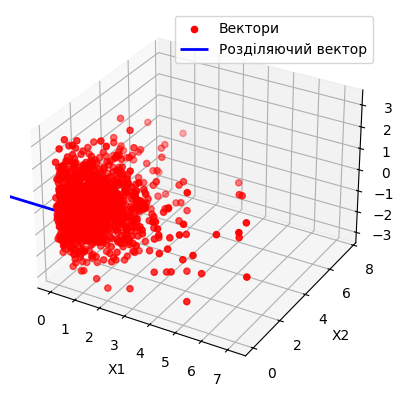

In [19]:
def main():
    """
    Основна функція для генерації випадкових векторів, обчислення розділяючого вектора
    та їхньої візуалізації.
    """
    try:
        num_vectors = int(input("Введіть кількість векторів (n): "))
        if num_vectors <= 0:
            raise ValueError("Кількість векторів повинна бути більше нуля.")
    except ValueError as error:
        print(f"Помилка вводу: {error}")
        return

    # Генерація випадкових векторів
    random_vectors = generate_random_vectors(num_vectors)
    print("\nПерші 10 згенерованих векторів:")
    print(random_vectors[:10])

    # Обчислення розділяючого вектора
    separating_vector = kozynets_separating_vector(random_vectors)

    if separating_vector is not None:
        print("\nЗнайдено розділяючий вектор:", separating_vector)
    else:
        print("\nРозділяючий вектор не знайдено. Початок координат може належати опуклій оболонці.")

    # Візуалізація результатів
    visualize_vectors_and_separator(random_vectors, separating_vector)
main()

**Пояснення**:

1. Розв'язання задачі визначення розділяючого вектора здійснюється за допомогою функції `linprog` із бібліотеки `scipy`, яка є ефективним і оптимізованим інструментом для лінійного програмування. Це дозволяє швидко знаходити рішення для задач такого типу.

2. Програма забезпечує інтерактивність, дозволяючи користувачеві ввести будь-яку кількість векторів \(N\). Згенеровані вектори виводяться на екран (перших 10 для зручності), а також візуалізуються у тривимірному просторі.

3. У разі успішного знаходження розділяючого вектора він виводиться на екран і відображається на графіку разом із згенерованими векторами. Це наочно демонструє коректність розв'язку задачі.

4. Якщо розділяючий вектор неможливо знайти (наприклад, якщо початок координат належить опуклій оболонці векторів), програма повідомляє про це, що допомагає користувачеві зрозуміти особливості розподілу даних.
